Accuracy: 0.61


/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_1180/3759226257.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').str.replace('s', '').astype(float)  # Handle '2s' case
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_1180/3759226257.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ssd'] = X['ssd'].str.replace(' GB', '').str.replace('s', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_1180/3759226257

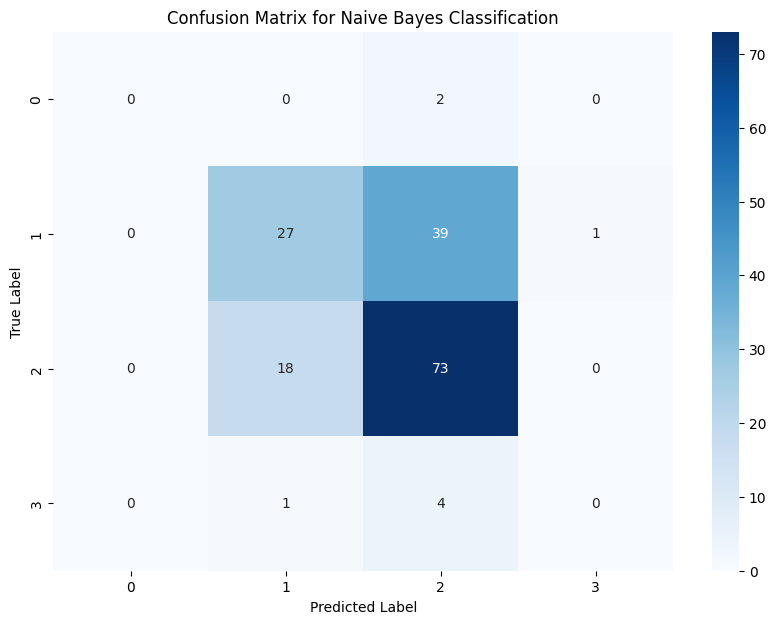

/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_1180/3759226257.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Rating')
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_1180/3759226257.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Rating')
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_1180/3759226257.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Rating')
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_1180/3759226257.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists

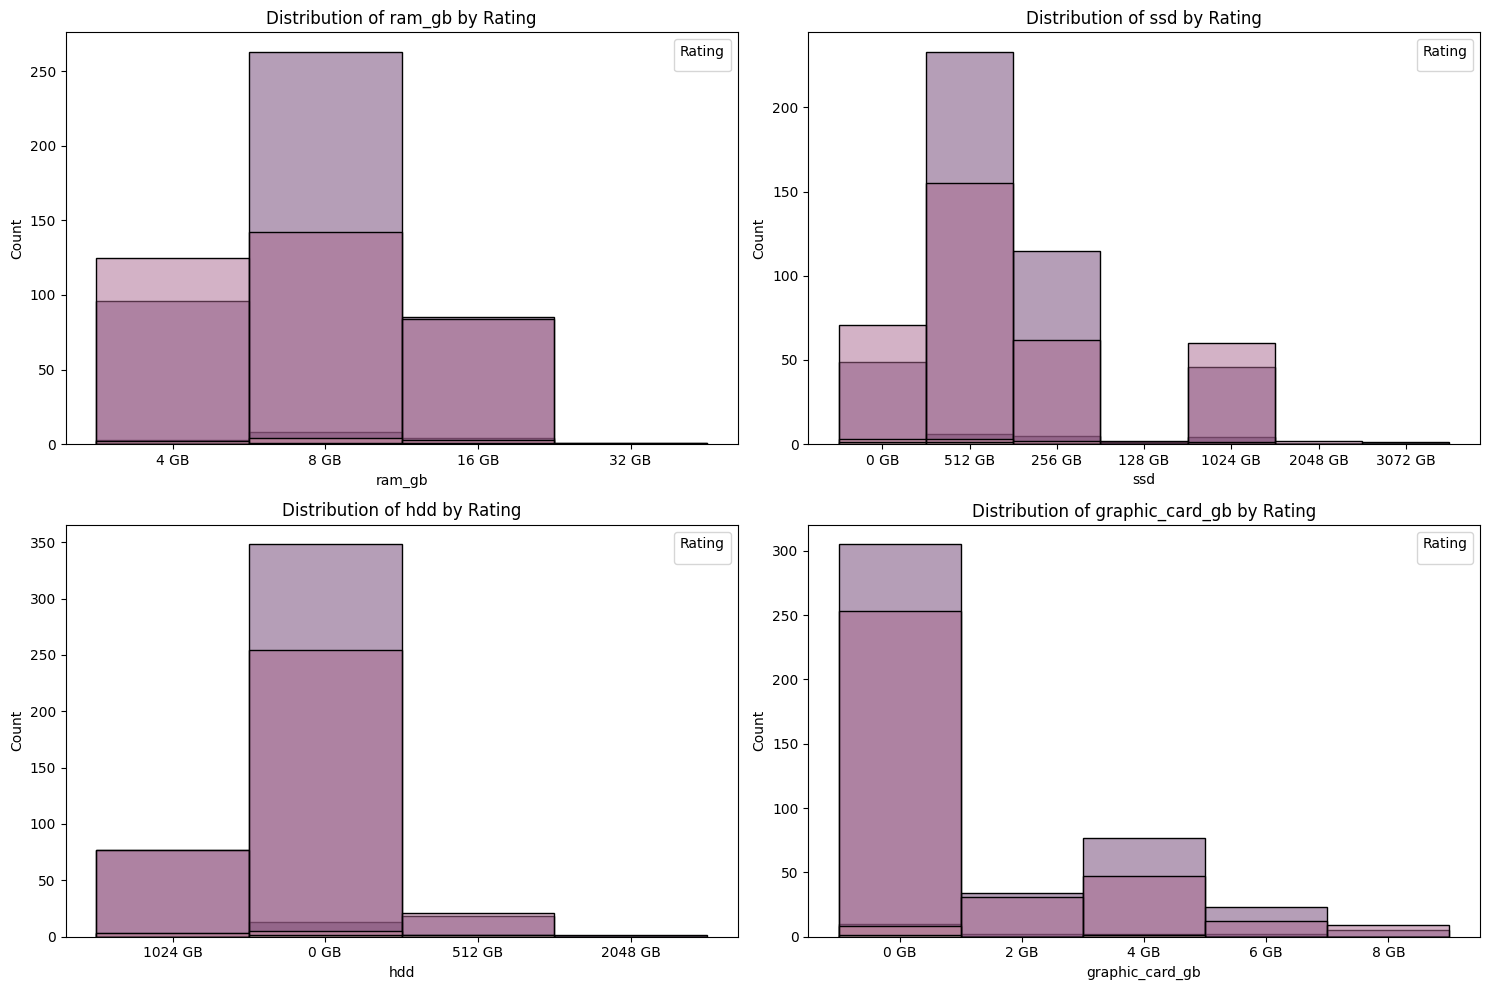

In [ ]:
# gaussian naive bayes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('../Ensemble/voting/laptopPrice.csv')

# Convert categorical rating to numeric classes
df['rating'] = df['rating'].str.replace(' star', '').str.replace('s', '').astype(float)  # Handle both 'star' and 'stars'

# Select features
X = df[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']]

# Clean numeric features
X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').str.replace('s', '').astype(float)  # Handle '2s' case
X['ssd'] = X['ssd'].str.replace(' GB', '').str.replace('s', '').astype(float)
X['hdd'] = X['hdd'].str.replace(' GB', '').str.replace('s', '').astype(float)
X['graphic_card_gb'] = X['graphic_card_gb'].str.replace(' GB', '').str.replace('s', '').astype(float)

y = df['rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot feature distributions by class
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']

for idx, (feature, ax) in enumerate(zip(features, axes.ravel())):
    sns.histplot(data=df, x=feature, hue='rating', multiple="layer", ax=ax)
    ax.set_title(f'Distribution of {feature} by Rating')
    ax.legend(title='Rating')

plt.tight_layout()
plt.show()



Multinomial Naive Bayes Results:
Accuracy: 0.0242

Classification Report:
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00        67
         4.0       0.00      0.00      0.00        91
         5.0       0.03      0.80      0.06         5

    accuracy                           0.02       165
   macro avg       0.01      0.20      0.01       165
weighted avg       0.00      0.02      0.00       165



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

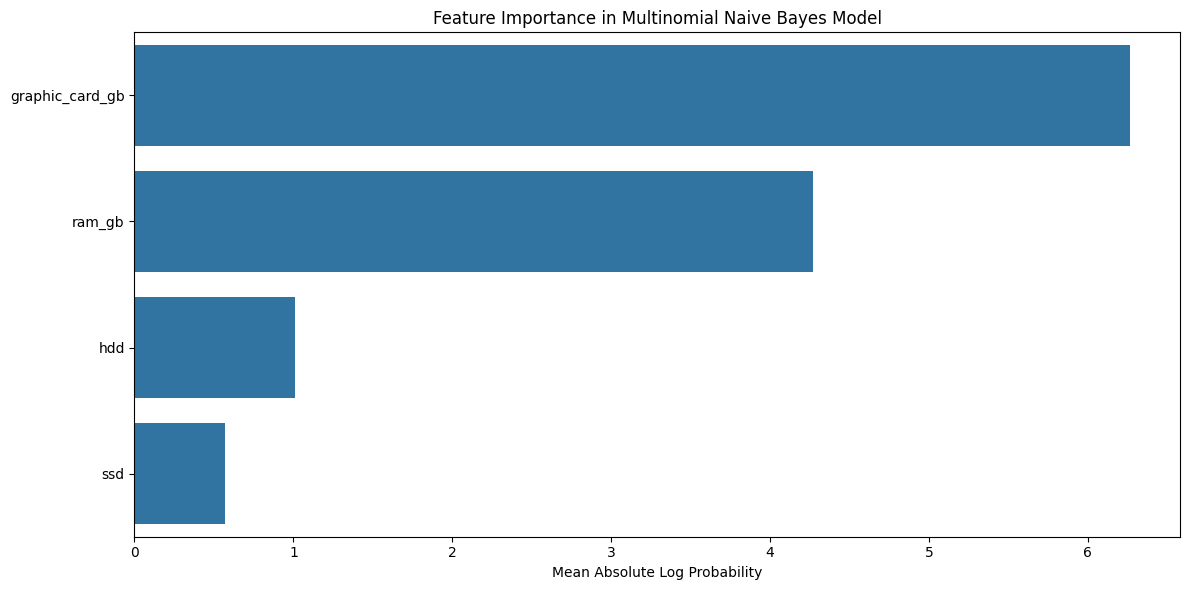


Top 5 Most Important Features (Multinomial NB):
graphic_card_gb: 6.2662
ram_gb: 4.2721
hdd: 1.0115
ssd: 0.5666


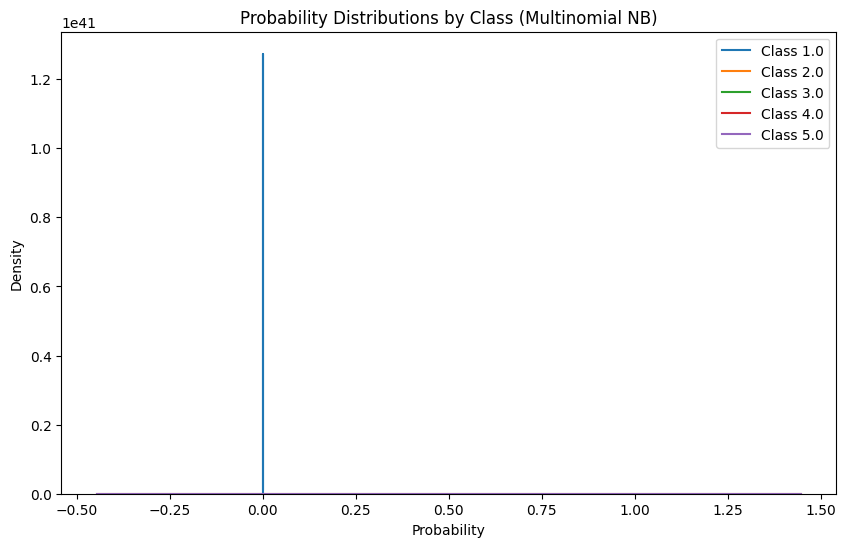

In [5]:
# Multinomial Naive Bayes

# Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the MultinomialNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions
y_pred_mnb = mnb.predict(X_test)

# Calculate and print accuracy score
mnb_accuracy = accuracy_score(y_test, y_pred_mnb)
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {mnb_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb))

# Calculate feature importance using log probabilities
feature_importance_mnb = {}
for i, feature in enumerate(X.columns):
    feature_importance_mnb[feature] = np.mean(np.abs(mnb.feature_log_prob_), axis=0)[i]

# Sort features by importance
sorted_features_mnb = sorted(feature_importance_mnb.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.figure(figsize=(12, 6))
features_mnb = [x[0] for x in sorted_features_mnb]
importance_mnb = [x[1] for x in sorted_features_mnb]

sns.barplot(x=importance_mnb, y=features_mnb)
plt.title('Feature Importance in Multinomial Naive Bayes Model')
plt.xlabel('Mean Absolute Log Probability')
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("\nTop 5 Most Important Features (Multinomial NB):")
for feature, importance in sorted_features_mnb[:5]:
    print(f"{feature}: {importance:.4f}")

# Calculate class-wise probabilities
class_probs_mnb = mnb.predict_proba(X_test)

# Plot probability distributions
plt.figure(figsize=(10, 6))
for i in range(len(mnb.classes_)):
    sns.kdeplot(class_probs_mnb[:, i], label=f'Class {mnb.classes_[i]}')
plt.title('Probability Distributions by Class (Multinomial NB)')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.show()



Bernoulli Naive Bayes Results:
Accuracy: 0.5697

Classification Report:
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         2
         3.0       0.57      0.19      0.29        67
         4.0       0.57      0.89      0.70        91
         5.0       0.00      0.00      0.00         5

    accuracy                           0.57       165
   macro avg       0.28      0.27      0.25       165
weighted avg       0.54      0.57      0.50       165



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

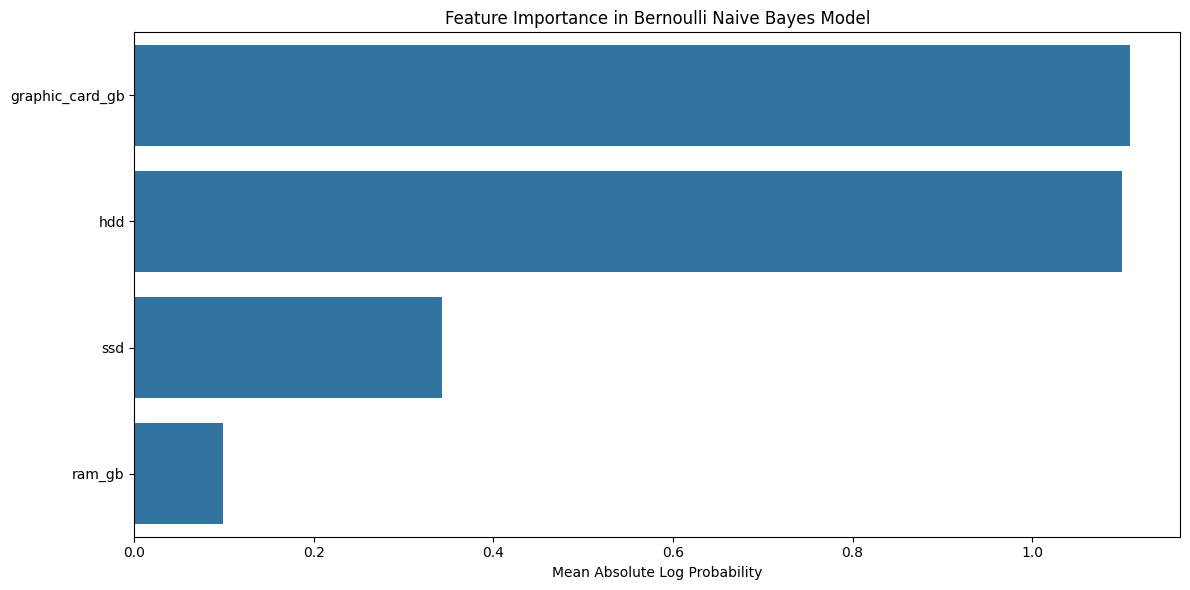


Top 5 Most Important Features (Bernoulli NB):
graphic_card_gb: 1.1094
hdd: 1.1005
ssd: 0.3421
ram_gb: 0.0984


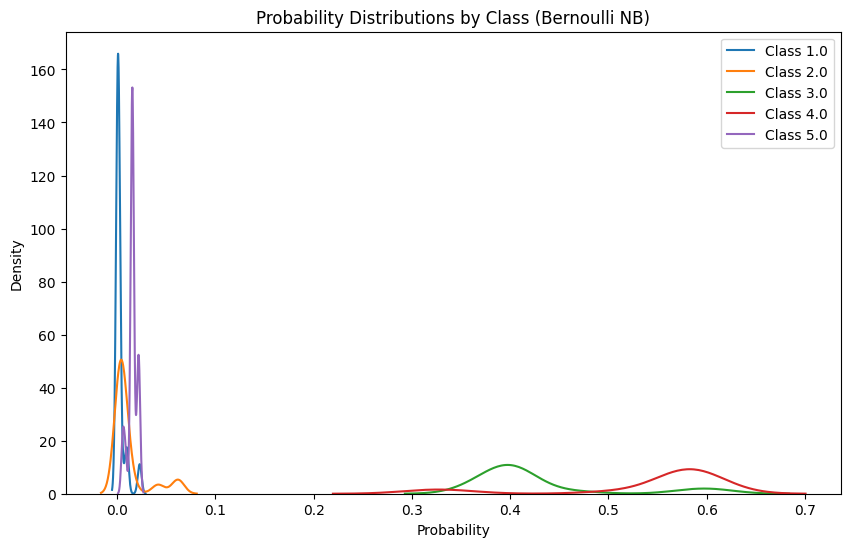

In [6]:
# Bernoulli Naive Bayes Implementation
from sklearn.naive_bayes import BernoulliNB

# Initialize and train Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions
y_pred_bnb = bnb.predict(X_test)

# Calculate and print accuracy score
bnb_accuracy = accuracy_score(y_test, y_pred_bnb)
print("\nBernoulli Naive Bayes Results:")
print(f"Accuracy: {bnb_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bnb))

# Calculate feature importance using log probabilities
feature_importance_bnb = {}
for i, feature in enumerate(X.columns):
    feature_importance_bnb[feature] = np.mean(np.abs(bnb.feature_log_prob_), axis=0)[i]

# Sort features by importance
sorted_features_bnb = sorted(feature_importance_bnb.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.figure(figsize=(12, 6))
features_bnb = [x[0] for x in sorted_features_bnb]
importance_bnb = [x[1] for x in sorted_features_bnb]

sns.barplot(x=importance_bnb, y=features_bnb)
plt.title('Feature Importance in Bernoulli Naive Bayes Model')
plt.xlabel('Mean Absolute Log Probability')
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("\nTop 5 Most Important Features (Bernoulli NB):")
for feature, importance in sorted_features_bnb[:5]:
    print(f"{feature}: {importance:.4f}")

# Calculate class-wise probabilities
class_probs_bnb = bnb.predict_proba(X_test)

# Plot probability distributions
plt.figure(figsize=(10, 6))
for i in range(len(bnb.classes_)):
    sns.kdeplot(class_probs_bnb[:, i], label=f'Class {bnb.classes_[i]}')
plt.title('Probability Distributions by Class (Bernoulli NB)')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.show()
